# Librerías

In [1]:
import pandas as pd
import seaborn as sb

# Importar los datos

In [2]:
df = pd.read_csv('/Users/lunaflorestorres/Desktop/Machine-Learning-Notes/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- sepal_length: representa la longitud del sépalo (la parte verde externa de la flor) en centímetros.
- sepal_width:  representa el ancho del sépalo en centímetros.
- petal_length: representa la longitud del pétalo en centímetros.
- petal_width: Esta variable representa el ancho del pétalo en centímetros.
- species: representa la especie de la flor de iris.

In [4]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Hay 3 tipos de especies: setosa, versicolor y virginica

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Primera exploración

In [8]:
from Toolbox_ML import *

In [9]:
from visualizaciones import *

## Función describe_df(df)

La función muestra los tipos de datos, los valores faltantes, los valores único y la cardinalidad

In [10]:
# def describe_df(df)

describe_df(df)

,sepal_length,sepal_width,petal_length,petal_width,species
Tipos,float64,float64,float64,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0
Valores Únicos,35,23,43,22,3
% Cardinalidad,23.33,15.33,28.67,14.67,2.0


## Función tipifica_variables(df, umbral_categoria, umbral_continua)

La función devuelve una lista de los datos numéricos y categóricos

In [11]:
# def tipifica_variables(df, umbral_categoria, umbral_continua)

tipifica_variables(df,5,9) 

,nombre_variable,tipo_sugerido
0,sepal_length,Numérica Continua
1,sepal_width,Numérica Continua
2,petal_length,Numérica Continua
3,petal_width,Numérica Continua
4,species,Categórica


### Explicación parámentros de la función:

- df: dataset
- 5: Determinar si una variable tiene un número de categorías inferior a 5, en cuyo caso se consideraría categórica.
- 9: Determinar si una variable tiene un rango de valores suficientemente grande para ser considerada continua en lugar de discreta.

## Función get_features_num_regression

La función encuentra las columnas numéricas que están más relacionadas con la variable especificada y que tienen una relación estadísticamente significativa, si se especifica.

In [12]:
# def get_features_num_regression(df, target_col, umbral_corr, pvalue = None)

get_features_num_regression(df, "sepal_length", 0.1)

['sepal_width', 'petal_length', 'petal_width']

In [13]:
get_features_num_regression(df, "petal_length", 0.5)

['sepal_length', 'petal_width']

In [14]:
get_features_num_regression(df, "species", 0.5, 0.05)

Error: La columna species no es numérica.


### Explicación parámentros de la función:

- df: dataset
- 0.5: La correlación mide la relación lineal entre dos variables. Puede variar entre -1 y 1.
- 0.05: De esas columnas que superan el umbral de correlación, solo consideras aquellas cuya correlación es estadísticamente significativa con un nivel de confianza del 95% (es decir, p-value menor o igual a 0.05).

## Función | plot_features_num_regression

Está función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas  incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. 

La función devolverá los valores de "columns" que cumplan con las condiciones anteriores.

* Con lista de columnas

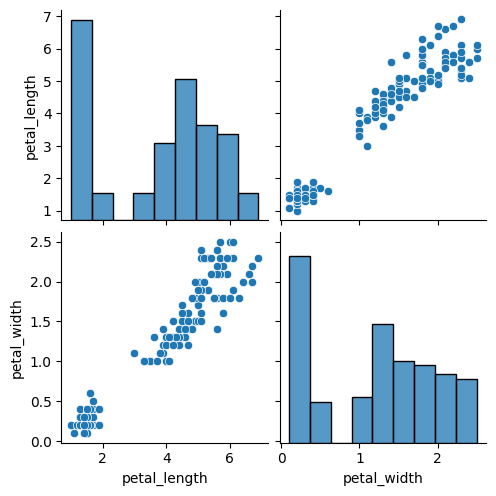

['petal_width']

In [15]:
# def plot_features_num_regression(df, target_col = "", columns = [], umbral_corr = 0, pvalue = None):

plot_features_num_regression(df, "petal_length", ["petal_width", "species"], umbral_corr = 0.4)

* Sin lista de columnas

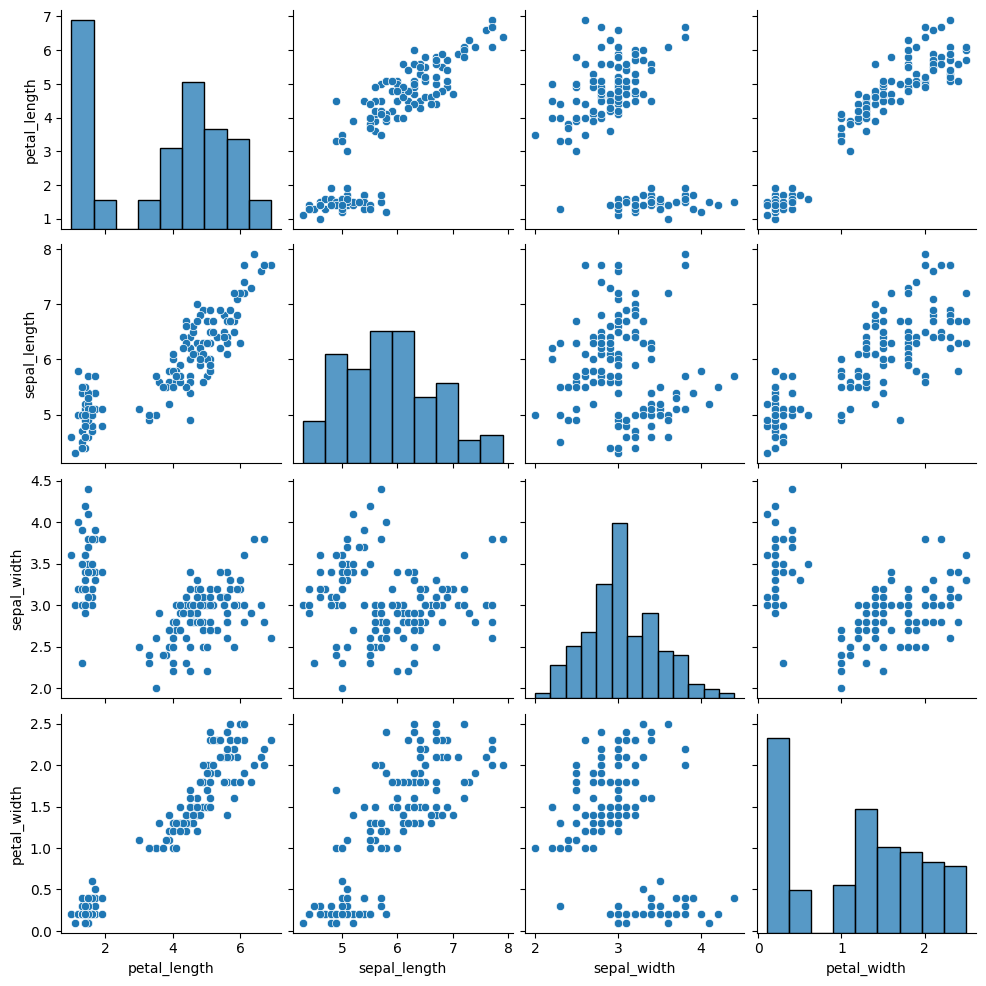

['sepal_length', 'sepal_width', 'petal_width']

In [16]:
plot_features_num_regression(df, "petal_length", umbral_corr = 0.4)

### Explicación parámentros de la función:

- df: dataset
- "petal_length": Es la columna del dataframe que se considerará como la variable objetivo.
- umbral_corr = 0.4: Es el umbral de correlación. Esto significa que solo se incluirán en el gráfico las variables que tienen una correlación con "petal_length" mayor en valor absoluto que 0.4.

Finalmente, devuelve una lista de los nombres de las columnas que cumplen con esta condición. En este caso, los nombres de las columnas devueltas son 'sepal_length', 'sepal_width', y 'petal_width'.

## Función get_features_cat_regression(df, target_col, pvalue = 0.05)

Analiza la relación entre las columnas categóricas del dataframe y la columna especificada como la variable objetivo. Si el valor predeterminado de pvalue (0.05) se utiliza, la función busca aquellas columnas categóricas que tengan una relación estadísticamente significativa con "target_col" según un nivel de significancia del 5%.

In [17]:
# def get_features_cat_regression(df, target_col, pvalue = 0.05)

get_features_cat_regression(df, "sepal_width")

['species']

In [18]:
get_features_cat_regression(df, "petal_width", pvalue= 1.5)

Error: El parametro pvalue 1.5  está fuera del rango [0,1].


## Función plot_features_cat_regression(df, target_col= "", columns=[], pvalue=0.05)

La función crea un gráfico para visualizar la relación entre las variables categóricas y la variable objetivo, resaltando aquellas que tienen una relación estadísticamente significativa según el valor de pvalue. Además, devuelve las columnas categóricas que cumplen con este criterio.









* Con lista

/Users/lunaflorestorres/Desktop/Machine-Learning-Notes/Supervisados/Toolbox_ML.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


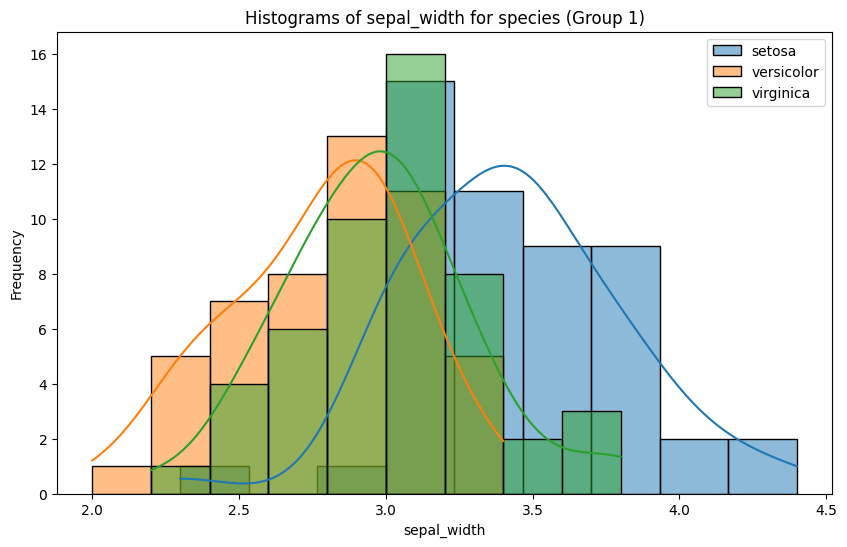

['species']

In [19]:
plot_features_cat_regression(df, "sepal_width", ["petal_width", "species"], 0.05)

* Sin lista

/Users/lunaflorestorres/Desktop/Machine-Learning-Notes/Supervisados/Toolbox_ML.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


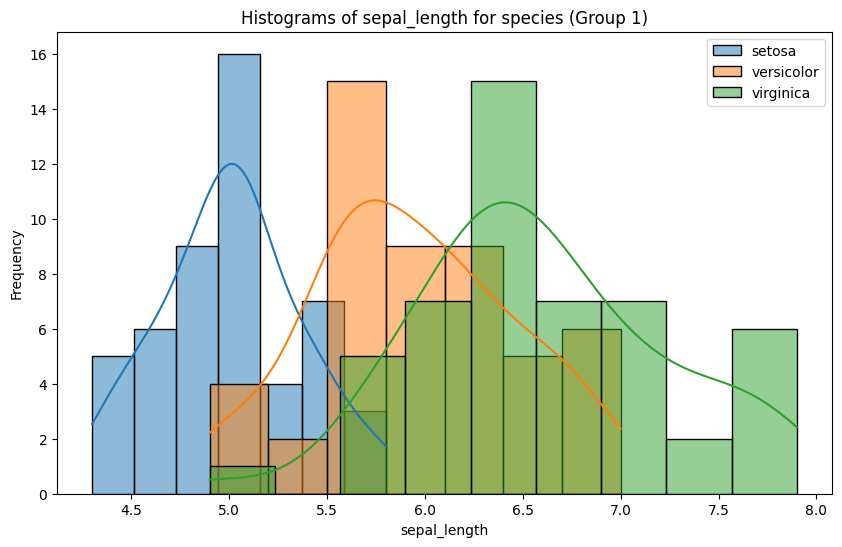

['species']

In [20]:
plot_features_cat_regression(df, "sepal_length")

### Explicación código:

La diferencia radica en qué columnas categóricas se están considerando y si se está especificando un valor para el nivel de significancia (pvalue). En el primer caso, estás especificando explícitamente las columnas y un valor para pvalue, mientras que en el segundo caso, no estás especificando columnas adicionales y se usará el valor predeterminado de pvalue.

## Más exploración del código

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

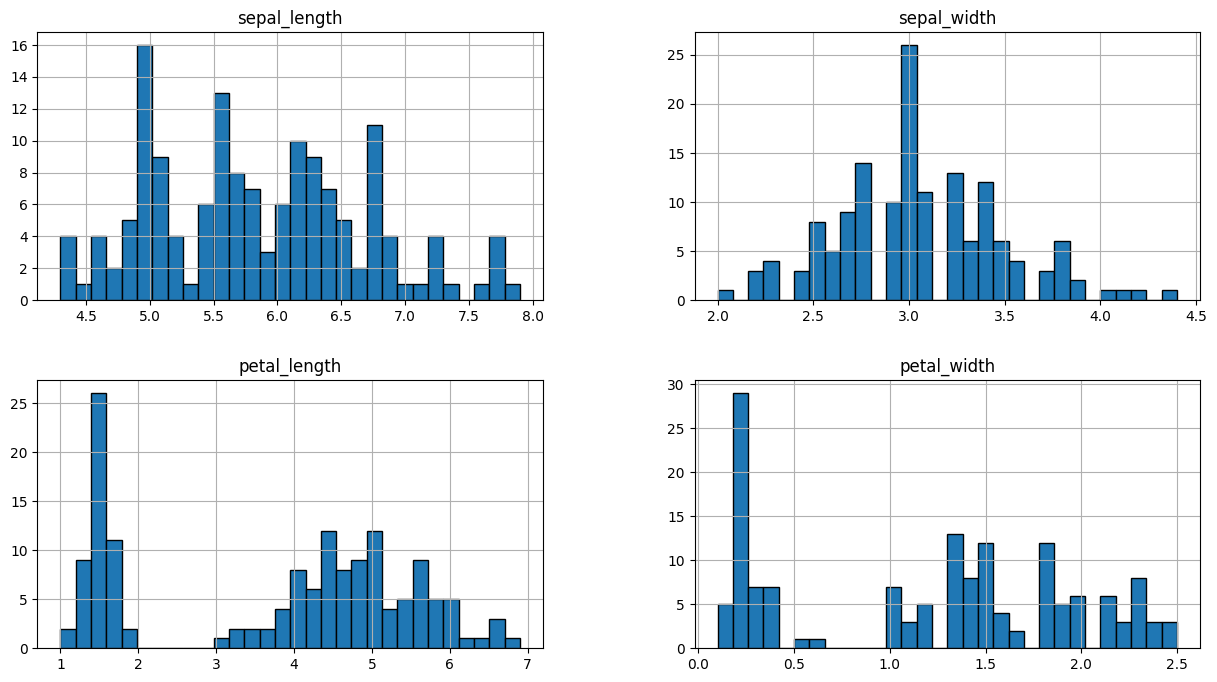

In [21]:
df.hist(figsize=(15,8), bins= 30, edgecolor = 'black' )

## Convertir variable 'species' a numérica

In [23]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
dummies =pd.get_dummies(df['species'],dtype=int)
dummies

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [25]:
# Guardamos los dummies dentro del df

df = df.join(dummies)

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [27]:
# Borro la columna de 'species' que ya no necesito

df = df.drop(['species'], axis= 1) #axis = 1 es para que sepa que 'species' se trata de una columna, no de una fila

# Correlaciones

In [28]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


<Axes: >

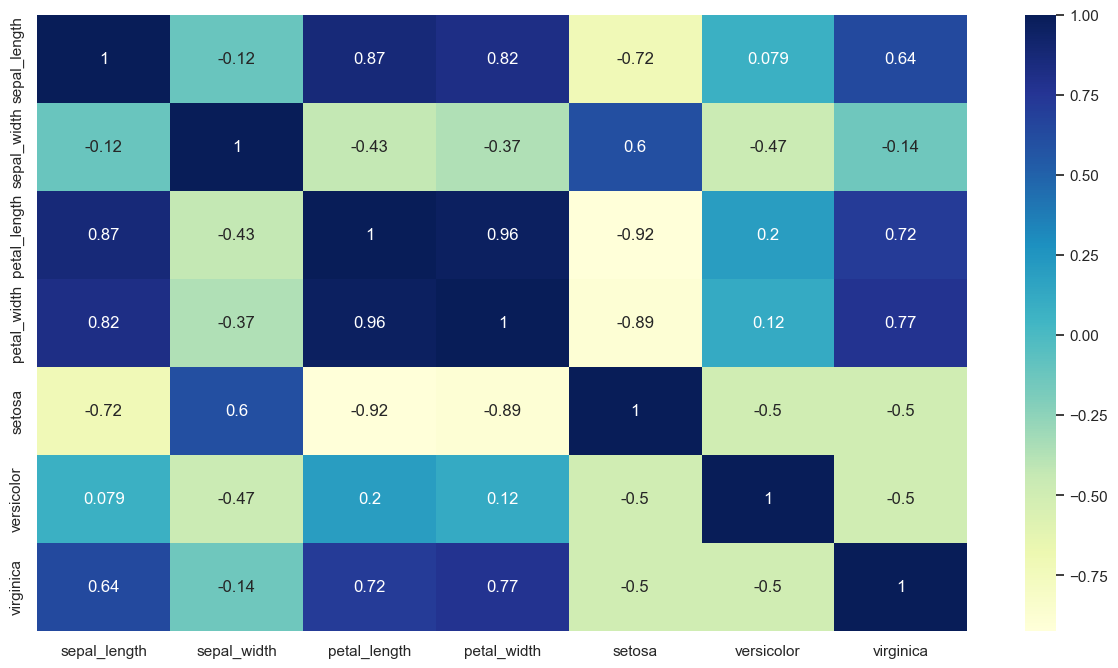

In [29]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(df.corr(), annot=True, cmap = "YlGnBu")

In [31]:
df.corr()['setosa'].sort_values(ascending=False)

setosa          1.000000
sepal_width     0.603348
versicolor     -0.500000
virginica      -0.500000
sepal_length   -0.717416
petal_width    -0.887344
petal_length   -0.922765
Name: setosa, dtype: float64

In [32]:
df.corr()['versicolor'].sort_values(ascending=False)

versicolor      1.000000
petal_length    0.201754
petal_width     0.117899
sepal_length    0.079396
sepal_width    -0.467703
setosa         -0.500000
virginica      -0.500000
Name: versicolor, dtype: float64

In [33]:
df.corr()['virginica'].sort_values(ascending=False)

virginica       1.000000
petal_width     0.769445
petal_length    0.721011
sepal_length    0.638020
sepal_width    -0.135645
versicolor     -0.500000
setosa         -0.500000
Name: virginica, dtype: float64

Podemos decir, por ejemplo, que entre un pétalo más grande, más probabilidad hay de que sea de tipo virginica